<a href="https://colab.research.google.com/github/tsnzzhr/Decision_Tree_DataProcessing/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from dtreeviz import *
from sklearn import tree


In [2]:
dataset = pd.read_csv("enterpreneurial_student_classification.csv")
dataset


,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,Engineering Sciences,Yes,19,Male,Yes,Yes,4,5,4,3,4,4,5,Yes,Positivity,NaN,1
215,Engineering Sciences,Yes,19,Male,Yes,No,2,2,2,2,2,2,2,No,Work Ethic,Just not interested! (Want to work in the corp...,0
216,Engineering Sciences,Yes,22,Female,Yes,Yes,3,4,4,3,4,4,3,No,Vision,NaN,1
217,Engineering Sciences,No,19,Male,Yes,No,1,2,2,3,3,2,2,No,Passion,Lack of Knowledge,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EducationSector         219 non-null    object
 1   IndividualProject       219 non-null    object
 2   Age                     219 non-null    int64 
 3   Gender                  219 non-null    object
 4   City                    219 non-null    object
 5   Influenced              219 non-null    object
 6   Perseverance            219 non-null    int64 
 7   DesireToTakeInitiative  219 non-null    int64 
 8   Competitiveness         219 non-null    int64 
 9   SelfReliance            219 non-null    int64 
 10  StrongNeedToAchieve     219 non-null    int64 
 11  SelfConfidence          219 non-null    int64 
 12  GoodPhysicalHealth      219 non-null    int64 
 13  MentalDisorder          219 non-null    object
 14  KeyTraits               219 non-null    object
 15  Reason

In [4]:
dataset.drop('ReasonsForLack', inplace=True, axis=1)
print(dataset)

          EducationSector IndividualProject  Age  ... MentalDisorder   KeyTraits  y
0    Engineering Sciences                No   19  ...            Yes     Passion  1
1    Engineering Sciences               Yes   22  ...            Yes      Vision  0
2    Engineering Sciences                No   18  ...             No     Passion  0
3    Engineering Sciences               Yes   20  ...             No  Resilience  0
4    Engineering Sciences               Yes   19  ...            Yes      Vision  1
..                    ...               ...  ...  ...            ...         ... ..
214  Engineering Sciences               Yes   19  ...            Yes  Positivity  1
215  Engineering Sciences               Yes   19  ...             No  Work Ethic  0
216  Engineering Sciences               Yes   22  ...             No      Vision  1
217  Engineering Sciences                No   19  ...             No     Passion  0
218  Engineering Sciences               Yes   18  ...             No     Pas

In [5]:
dataset.isnull().sum()

EducationSector           0
IndividualProject         0
Age                       0
Gender                    0
City                      0
Influenced                0
Perseverance              0
DesireToTakeInitiative    0
Competitiveness           0
SelfReliance              0
StrongNeedToAchieve       0
SelfConfidence            0
GoodPhysicalHealth        0
MentalDisorder            0
KeyTraits                 0
y                         0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dataset['EducationSector'] = labelencoder.fit_transform(dataset['EducationSector'])
dataset['IndividualProject'] = labelencoder.fit_transform(dataset['IndividualProject'])
dataset['Gender'] = labelencoder.fit_transform(dataset['Gender'])
dataset['City'] = labelencoder.fit_transform(dataset['City'])
dataset['Influenced'] = labelencoder.fit_transform(dataset['Influenced'])
dataset['MentalDisorder'] = labelencoder.fit_transform(dataset['MentalDisorder'])
dataset['KeyTraits'] = labelencoder.fit_transform(dataset['KeyTraits'])

In [7]:
y_target  = dataset.y
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [9]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [10]:
print('Accuracy:', metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.5454545454545454


[Text(134.81415198237886, 210.645, 'X[5] <= 0.5\ngini = 0.486\nsamples = 197\nvalue = [115, 82]'),
 Text(38.34713656387665, 197.055, 'X[14] <= 3.5\ngini = 0.352\nsamples = 57\nvalue = [44, 13]'),
 Text(32.44757709251101, 183.465, 'X[0] <= 1.5\ngini = 0.405\nsamples = 46\nvalue = [33, 13]'),
 Text(26.548017621145377, 169.875, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(38.34713656387665, 169.875, 'X[1] <= 0.5\ngini = 0.456\nsamples = 37\nvalue = [24, 13]'),
 Text(11.799118942731278, 156.285, 'X[10] <= 2.5\ngini = 0.278\nsamples = 18\nvalue = [15, 3]'),
 Text(5.899559471365639, 142.695, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(17.698678414096918, 142.695, 'X[7] <= 4.5\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(11.799118942731278, 129.10500000000002, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(23.598237885462556, 129.10500000000002, 'X[2] <= 19.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(17.698678414096918, 115.515, 'gini = 0.0\nsamples = 2\nval

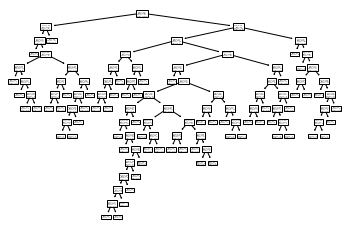

In [11]:
tree.plot_tree(clf)

In [12]:
dataset

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,y
0,2,0,19,1,1,0,2,2,3,3,2,2,3,1,0,1
1,2,1,22,1,0,1,3,3,3,4,4,3,4,1,3,0
2,2,0,18,1,1,0,3,4,3,3,3,4,4,0,0,0
3,2,1,20,1,1,1,3,3,3,3,4,3,3,0,2,0
4,2,1,19,1,1,1,2,3,3,3,4,3,2,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,2,1,19,1,1,1,4,5,4,3,4,4,5,1,1,1
215,2,1,19,1,1,0,2,2,2,2,2,2,2,0,4,0
216,2,1,22,0,1,1,3,4,4,3,4,4,3,0,3,1
217,2,0,19,1,1,0,1,2,2,3,3,2,2,0,0,0


In [13]:
dataset.EducationSector.head(100)

0     2
1     2
2     2
3     2
4     2
     ..
95    2
96    1
97    2
98    7
99    2
Name: EducationSector, Length: 100, dtype: int64

In [21]:
dataset.columns

Index(['EducationSector', 'IndividualProject', 'Age', 'Gender', 'City',
       'Influenced', 'Perseverance', 'DesireToTakeInitiative',
       'Competitiveness', 'SelfReliance', 'StrongNeedToAchieve',
       'SelfConfidence', 'GoodPhysicalHealth', 'MentalDisorder', 'KeyTraits',
       'y'],
      dtype='object')

[Text(134.81415198237886, 210.645, 'Influenced <= 0.5\ngini = 0.486\nsamples = 197\nvalue = [115, 82]\nclass = 0'),
 Text(38.34713656387665, 197.055, 'KeyTraits <= 3.5\ngini = 0.352\nsamples = 57\nvalue = [44, 13]\nclass = 0'),
 Text(32.44757709251101, 183.465, 'EducationSector <= 1.5\ngini = 0.405\nsamples = 46\nvalue = [33, 13]\nclass = 0'),
 Text(26.548017621145377, 169.875, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = 0'),
 Text(38.34713656387665, 169.875, 'IndividualProject <= 0.5\ngini = 0.456\nsamples = 37\nvalue = [24, 13]\nclass = 0'),
 Text(11.799118942731278, 156.285, 'StrongNeedToAchieve <= 2.5\ngini = 0.278\nsamples = 18\nvalue = [15, 3]\nclass = 0'),
 Text(5.899559471365639, 142.695, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'),
 Text(17.698678414096918, 142.695, 'DesireToTakeInitiative <= 4.5\ngini = 0.117\nsamples = 16\nvalue = [15, 1]\nclass = 0'),
 Text(11.799118942731278, 129.10500000000002, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]\nclass = 0'),
 Text

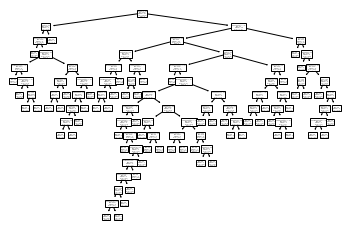

In [22]:
dataset_features = ['EducationSector', 'IndividualProject', 'Age', 'Gender', 'City',
       'Influenced', 'Perseverance', 'DesireToTakeInitiative',
       'Competitiveness', 'SelfReliance', 'StrongNeedToAchieve',
       'SelfConfidence', 'GoodPhysicalHealth', 'MentalDisorder', 'KeyTraits']
tree.plot_tree(clf,
               feature_names = dataset_features, 
               class_names=['0','1'])

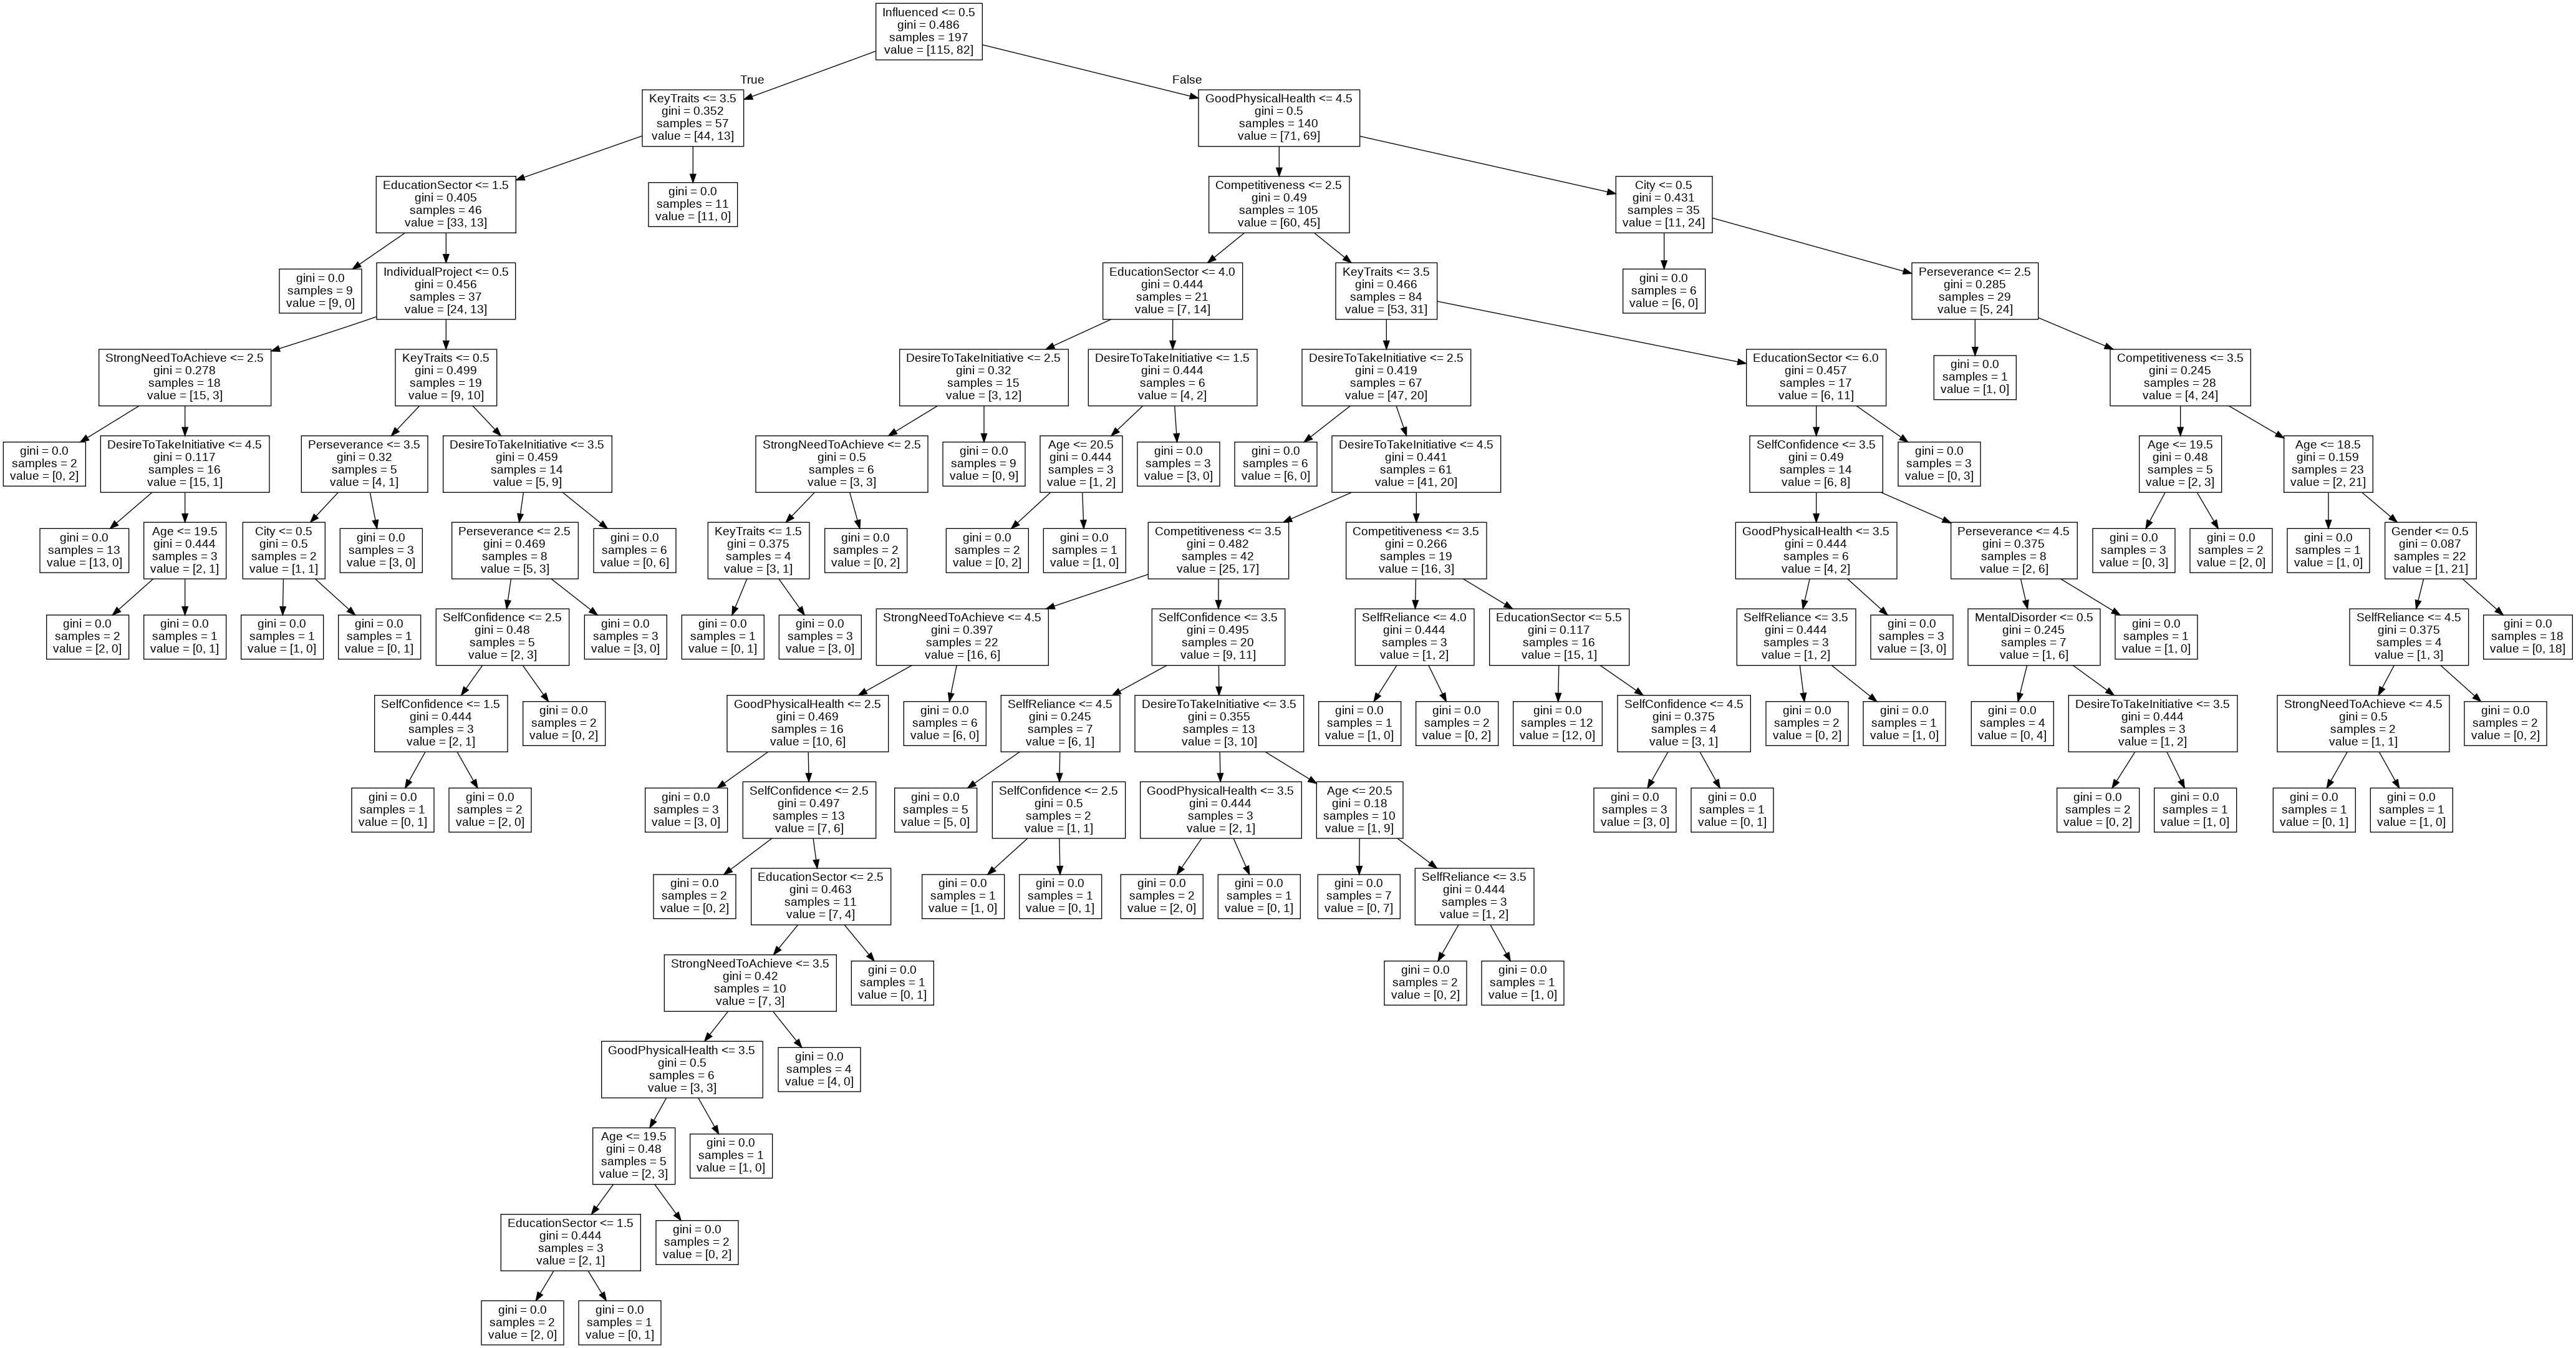

In [23]:
from graphviz import Source
graph = Source( tree.export_graphviz(clf, out_file=None, feature_names=dataset_features))
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)